
train shape = (60000, 28, 28) , train label shape = (60000,)
test shape = (10000, 28, 28) , test label shape = (10000,)

train label = [9 0 0 ... 3 0 5]
test label = [9 2 1 ... 8 1 5]


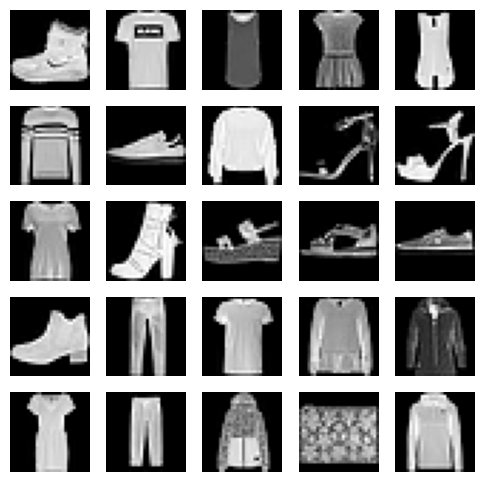

In [6]:
# 데이터 불러오기 및 확인
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\ntrain shape =', x_train.shape,
      ', train label shape =', t_train.shape)
print('test shape =', x_test.shape,
      ', test label shape =', t_test.shape)

print('\ntrain label =', t_train) # 학습데이터 정답 출력
print('test label =', t_test) # 테스트 데이터 정답 출력

import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25): # 25개의 이미지 출력
  plt.subplot(5, 5, index + 1) # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')

plt.show()

In [7]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 원핫 인코딩은 수행하지 않음
# t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
# t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [8]:
# 모델 구축 및 컴파일
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 11s 7ms/step - loss: 0.5441 - accuracy: 0.8113 - val_loss: 0.4517 - val_accuracy: 0.8413
Epoch 2/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4012 - accuracy: 0.8582 - val_loss: 0.4022 - val_accuracy: 0.8581
Epoch 3/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3593 - accuracy: 0.8709 - val_loss: 0.3841 - val_accuracy: 0.8646
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3325 - accuracy: 0.8806 - val_loss: 0.3750 - val_accuracy: 0.8628
Epoch 5/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3125 - accuracy: 0.8850 - val_loss: 0.3411 - val_accuracy: 0.8776
Epoch 6/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2968 - accuracy: 0.8896 - val_loss: 0.3381 - val_accuracy: 0.8779
Epoch 7/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2811 - accuracy: 0.8959 - val_loss: 0.3351 - val_accuracy

In [10]:
# 모델 (정확도) 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8824


[0.4232282340526581, 0.8823999762535095]

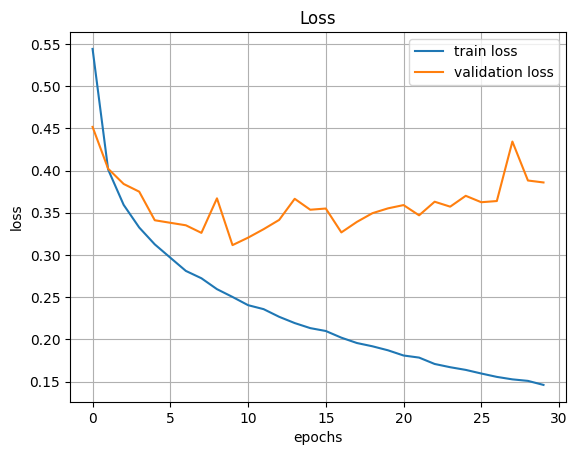

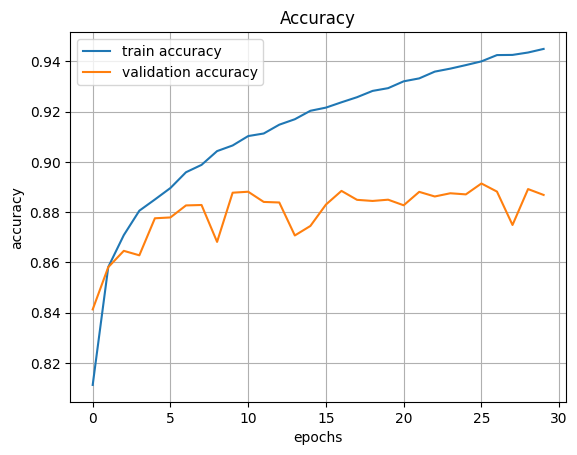

In [11]:
# 손실 및 정확도
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

313/313 [==============================] - 2s 5ms/step


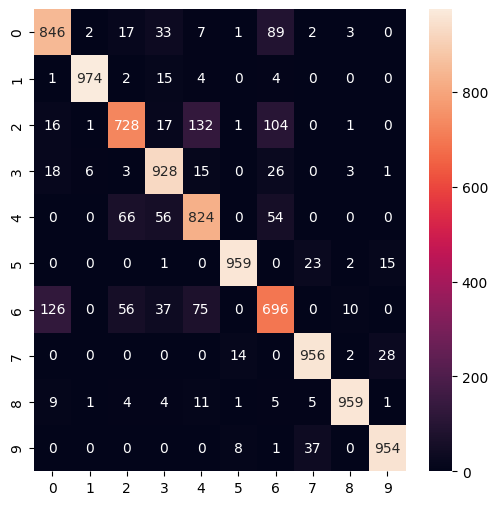

In [12]:
# 혼동 행렬 (confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)
cm = confusion_matrix(t_test,
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()